## Задача на собственные частоты голосового тракта

$$\frac{d}{dx}(S(x)\frac{d}{dx}\Psi(x)) + \lambda S(x)\Psi(x) = 0, 0 < x < L$$

$$\Psi'(0) = 0, 8\sqrt{S(L)}\Psi'(L) + 3\pi\sqrt{\pi}\Psi(L) = 0$$

$S(x)$ - площадь сечения голосового тракта

In [1]:
from SLPlib import *
from math import *
import matplotlib.pyplot as plt
from splinelib import NaturalSpline
    
def show_result(N : int, solution : tuple[float, list[Vector | float]], L : float):
    lb, us = solution
    h = L/N
    xs = [h*k for k in range(N + 1)]
    ys = us if (isinstance(us[0], float) or isinstance(us[0], int)) else [us[k][0] for k in range(N + 1)]
    plt.plot(xs, ys)
    plt.xlabel("x, мм")
    plt.ylabel("$\\Psi$")
    plt.title(f"$\\Psi(x)$ for $f={int(sqrt(lb) * 331e3 / 2 / pi)}$ Hz")
    plt.show()

S = NaturalSpline([2.5*k for k in range(67)], 
    [78.2, 66.4, 43, 39.1, 33.2, 25.4, 31.3, 50.8, 87.7, 444, 523.2, 532.2, 538.5, 531.7, 527.2, 504.5, 498.7, 527,
    570.6, 572.5, 566.7, 549.1, 535.4, 515.9, 486.6, 453.3, 434.8, 420, 420.7, 437.2, 470.5, 480.8, 457.2, 408.4, 361.5,
    340, 295.5, 257.9, 203.2, 144.6, 103.6, 80.1, 64.5, 33.2, 21.5, 13.7, 7.8, 13.7, 23.4, 27.4, 23.4, 21.2, 18.5,
    13, 11.3, 7.2, 5.8, 5.9, 9.8, 9, 19.5, 23.4, 37.1, 52.8, 86, 139.7, 139.7])

L = 165
def R(y, dy):
    return 8*sqrt(S(L))*dy + 3*pi*sqrt(pi)*y

def ftol(f : float):
    return (f * 2 * pi / 331e3)**2

### Метод стрельбы

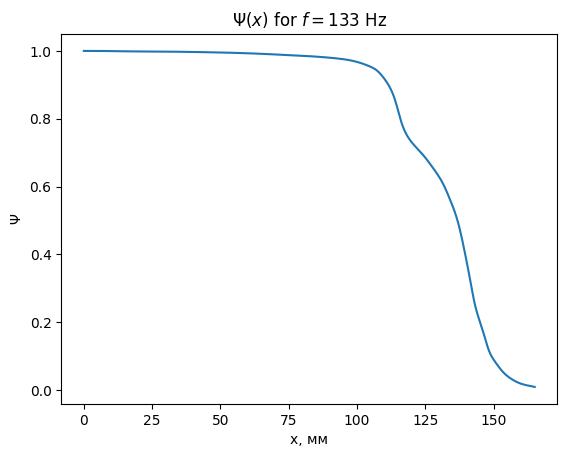

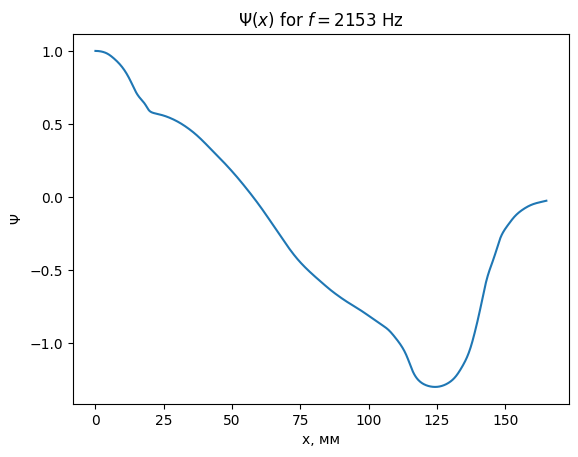

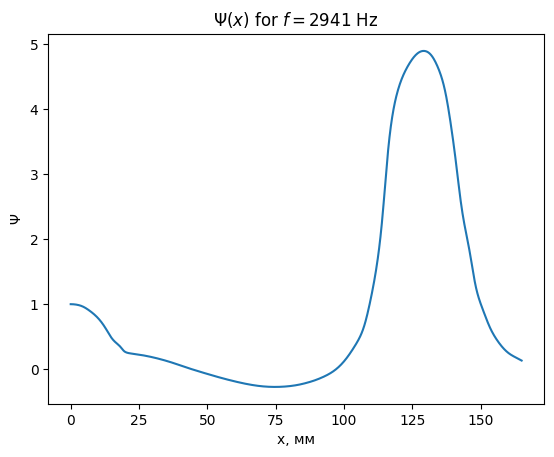

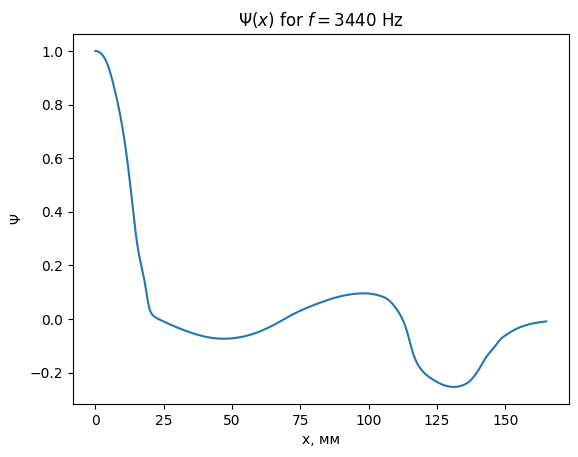

In [2]:
N = 1000
show_result(N, SLPSolver.solve_by_shooting_method(S, R, N, L, ftol(0)), L)
show_result(N, SLPSolver.solve_by_shooting_method(S, R, N, L, ftol(2000)), L)
show_result(N, SLPSolver.solve_by_shooting_method(S, R, N, L, ftol(3000)), L)
show_result(N, SLPSolver.solve_by_shooting_method(S, R, N, L, ftol(3500)), L)

### Метод дополненного вектора

Конечно-разностная задача:

$$
\begin{cases}
    4\Psi_1 - 3\Psi_0 - \Psi_2 = 0 \\
    S_{n+\frac{1}{2}}(\Psi_{n+1} - \Psi_n) + S_{n-\frac{1}{2}}(\Psi_{n-1} - \Psi_n) + \lambda h^2 S_n \Psi_n = 0, n = \overline{1, N-1} \\
    8\sqrt{S(L)}(3\Psi_N - 4\Psi_{N-1} + \Psi_{N-2}) + 6\pi h \sqrt{\pi}\Psi_N = 0?
\end{cases}
$$

Решение будем искать относитльно $\vec{u} = (\Psi_0, ..., \Psi_N, \lambda)^T$, используя метод Ньютона:

$$J(\vec{u})\Delta \vec{u} = - F(\vec{u})$$

В качестве $(N+1)$-го уравнения возьмём $\Psi_2 - 1 = 0 \Rightarrow \Delta u_2 = 0$


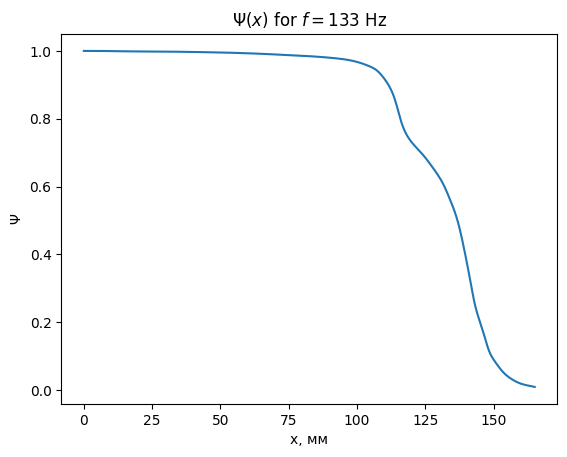

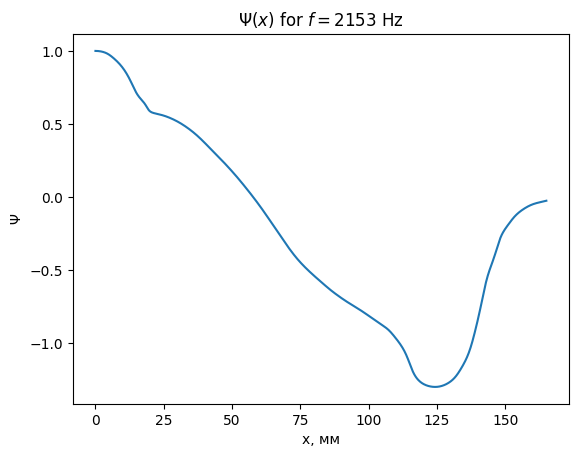

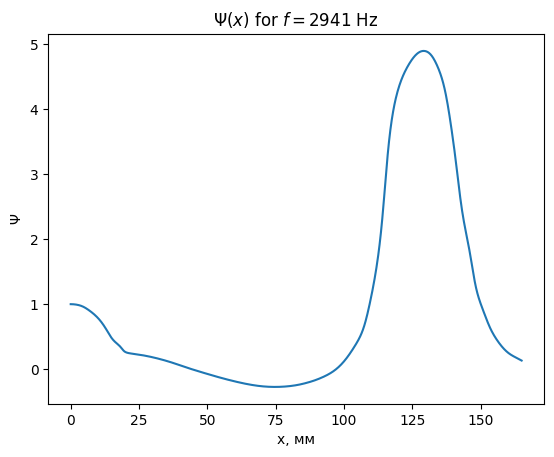

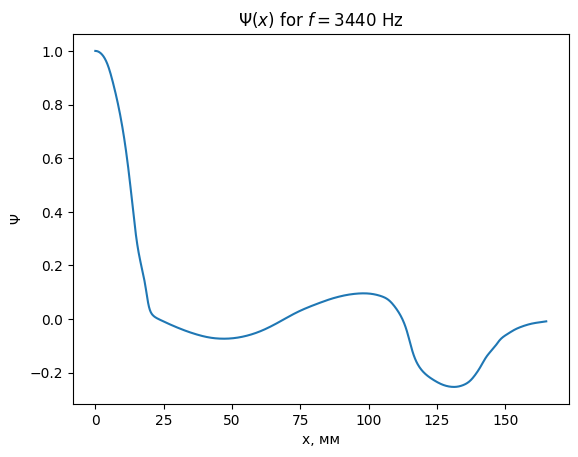

In [3]:
N = 1000
show_result(N, SLPSolver.solve_by_augmented_vector_method(S, 8*sqrt(S(L)), 3*pi*sqrt(pi), N, L, ftol(0)), L)
show_result(N, SLPSolver.solve_by_augmented_vector_method(S, 8*sqrt(S(L)), 3*pi*sqrt(pi), N, L, ftol(2100)), L)
show_result(N, SLPSolver.solve_by_augmented_vector_method(S, 8*sqrt(S(L)), 3*pi*sqrt(pi), N, L, ftol(2950)), L)
show_result(N, SLPSolver.solve_by_augmented_vector_method(S, 8*sqrt(S(L)), 3*pi*sqrt(pi), N, L, ftol(3450)), L)